In [1]:
import sys 
import numpy
import matplotlib
import pandas
import sklearn


In [3]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Load data
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names=['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','signle_epithelial_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df=pd.read_csv(url,names=names)

In [5]:
#data preprocessing
df.replace('?',-99999, inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [7]:
#shape of data

df.drop(['id'],1,inplace=True)
print(df.shape)

(699, 10)


In [8]:
#visualisation
df.head()

clump_thickness  uniform_cell_size  uniform_cell_shape  marginal_adhesion  \
0                5                  1                   1                  1   
1                5                  4                   4                  5   
2                3                  1                   1                  1   
3                6                  8                   8                  1   
4                4                  1                   1                  3   

   signle_epithelial_size bare_nuclei  bland_chromatin  normal_nucleoli  \
0                       2           1                3                1   
1                       7          10                3                2   
2                       2           2                3                1   
3                       3           4                3                7   
4                       2           1                3                1   

   mitoses  class  
0        1      2  
1        1      2  
2        1      2  
3        1      2  
4        1      2

In [9]:
df.describe()

clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  signle_epithelial_size  bland_chromatin  \
count         699.000000              699.000000       699.000000   
mean            2.806867                3.216023         3.437768   
std             2.855379                2.214300         2.438364   
min             1.000000                1.000000         1.000000   
25%             1.000000                2.000000         2.000000   
50%             1.000000                2.000000         3.000000   
75%             4.000000                4.000000         5.000000   
max            10.000000               10.000000        10.000000   

       normal_nucleoli     mitoses       class  
count       699.000000  699.000000  699.000000  
mean          2.866953    1.589413    2.689557  
std           3.053634    1.715078    0.951273  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

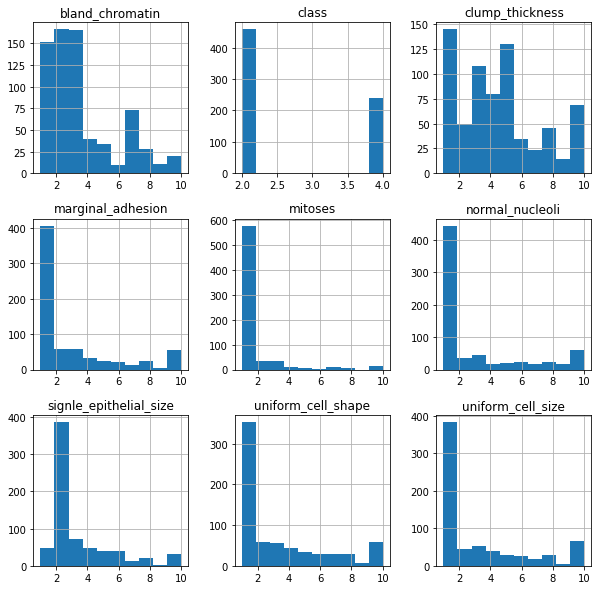

In [10]:
#histogram for each variable
df.hist(figsize=(10,10))
plt.show()

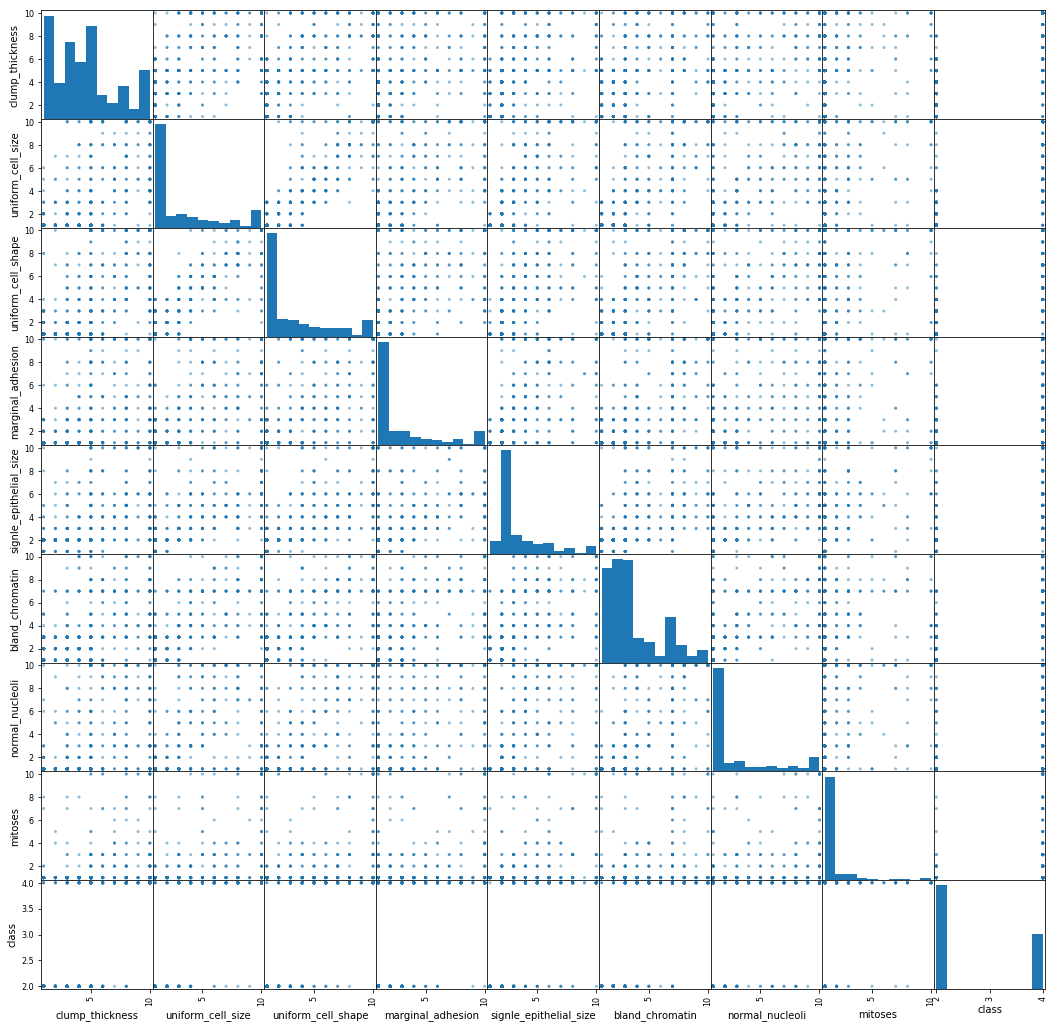

In [12]:
#scatter plot matrix
scatter_matrix(df,figsize=(18,18))
plt.show()

In [20]:
#splitting data
X=np.array(df.drop(['class'],1))

y=np.array(df['class'])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
seed=8; 
scoring='accuracy'

In [23]:
#models

models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC(gamma='auto')))

results=[]
names=[]

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

KNN:0.980260 (0.017044)
SVM:0.967825 (0.020803)


In [24]:
#prediction
for name,model in models:
    model.fit(X_train,y_train)
    predictions=model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))

KNN
0.9428571428571428
              precision    recall  f1-score   support

           2       0.98      0.94      0.96       101
           4       0.86      0.95      0.90        39

   micro avg       0.94      0.94      0.94       140
   macro avg       0.92      0.94      0.93       140
weighted avg       0.95      0.94      0.94       140

SVM
0.9357142857142857
              precision    recall  f1-score   support

           2       0.99      0.92      0.95       101
           4       0.83      0.97      0.89        39

   micro avg       0.94      0.94      0.94       140
   macro avg       0.91      0.95      0.92       140
weighted avg       0.94      0.94      0.94       140

